<a href="https://colab.research.google.com/github/nshkwon/Side-ML-Projects/blob/main/1_Loan_approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREPROCESSING

In [ ]:
# loan approved or not problem
# https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction

In [ ]:
dataset = pd.read_csv('/content/loan_data.csv')

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
dataset.shape

(381, 13)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
dataset.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
dataset.select_dtypes(include=['float64','int']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [ ]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.isnull().values.sum()

75

In [ ]:
dataset.columns[dataset.isnull().any()]

Index(['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [ ]:
dataset['Gender'].isnull().values.sum()

5

In [ ]:
dataset['Dependents'].isnull().values.sum()

8

In [ ]:
dataset['Self_Employed'].isnull().values.sum()

21

In [ ]:
dataset['Loan_Amount_Term'].isnull().values.sum()

11

In [ ]:
dataset['Credit_History'].isnull().values.sum()

30

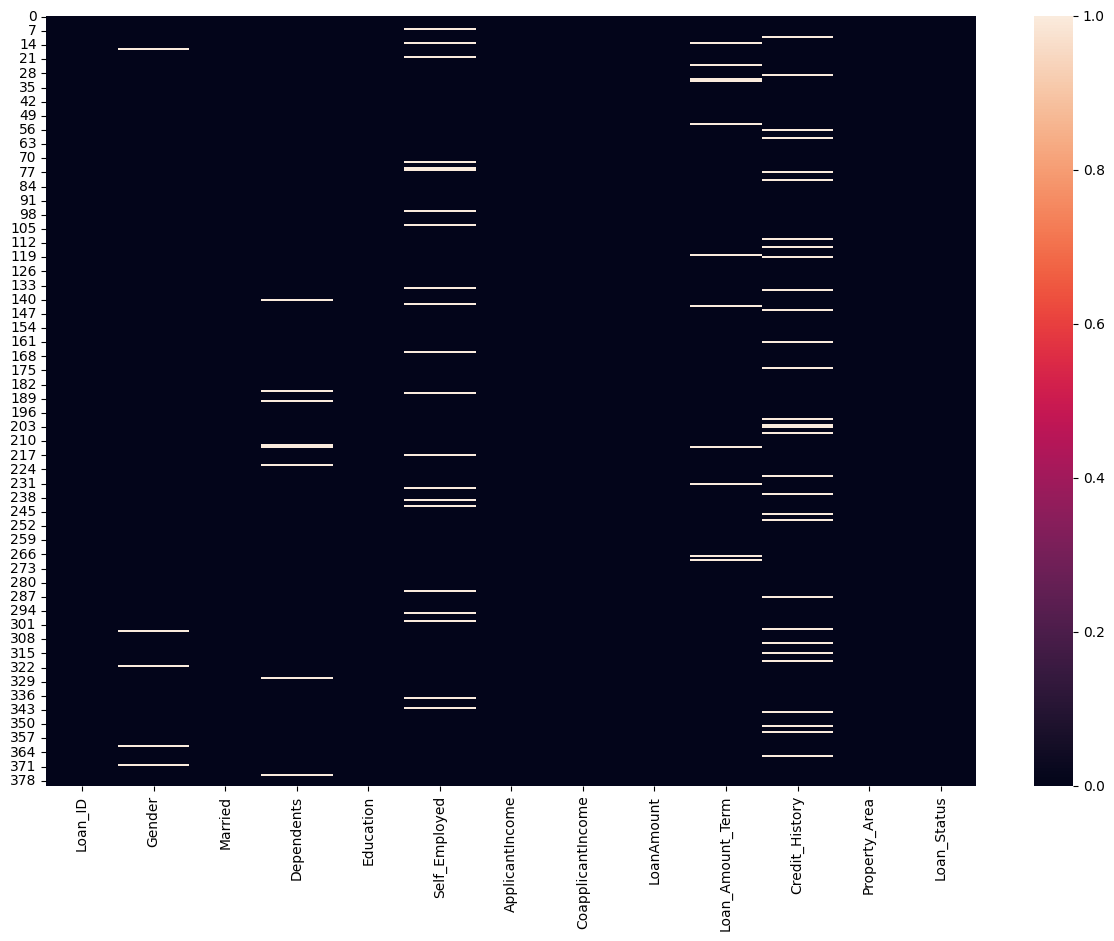

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.isnull())
plt.show()

In [ ]:
numerical_columns = dataset.select_dtypes(include=[np.number])

# From those, select columns that have any missing values
numerical_columns_with_nulls = numerical_columns.columns[numerical_columns.isnull().any()]

In [ ]:
numerical_columns_with_nulls

Index(['Loan_Amount_Term', 'Credit_History'], dtype='object')

In [ ]:
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())
dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].mean())

In [ ]:
# now categorical null values

In [ ]:
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])
dataset['Dependents'] = dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [ ]:
len(dataset.columns[dataset.isnull().any()])

0

## Encoding catagorical

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
dataset['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
dataset['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [ ]:
dataset['Dependents'] = dataset['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3])

In [ ]:
dataset['Dependents'].unique()

array([1, 0, 2, 3])

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
dataset = dataset.drop(columns=['Loan_ID'])
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [ ]:
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
dataset.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
3,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
4,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,1,1


In [ ]:
dataset.shape

(381, 13)

In [ ]:
dataset.isnull().values.any()

False

## Countplot

<function matplotlib.pyplot.show(close=None, block=None)>

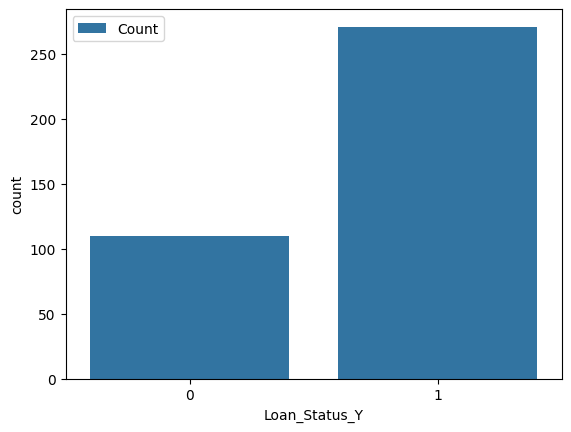

In [ ]:
sns.countplot(data=dataset, x=dataset.Loan_Status_Y, label='Count')
plt.show

In [ ]:
(dataset.Loan_Status_Y==0).sum()

110

In [ ]:
(dataset.Loan_Status_Y==1).sum()

271

## Correlation

In [ ]:
# delete stroke colum for dataset 2
dataset_2 = dataset.drop(columns='Loan_Status_Y')
dataset_2.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
3,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
4,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,1


<Axes: title={'center': 'Correlated with Loan Status'}>

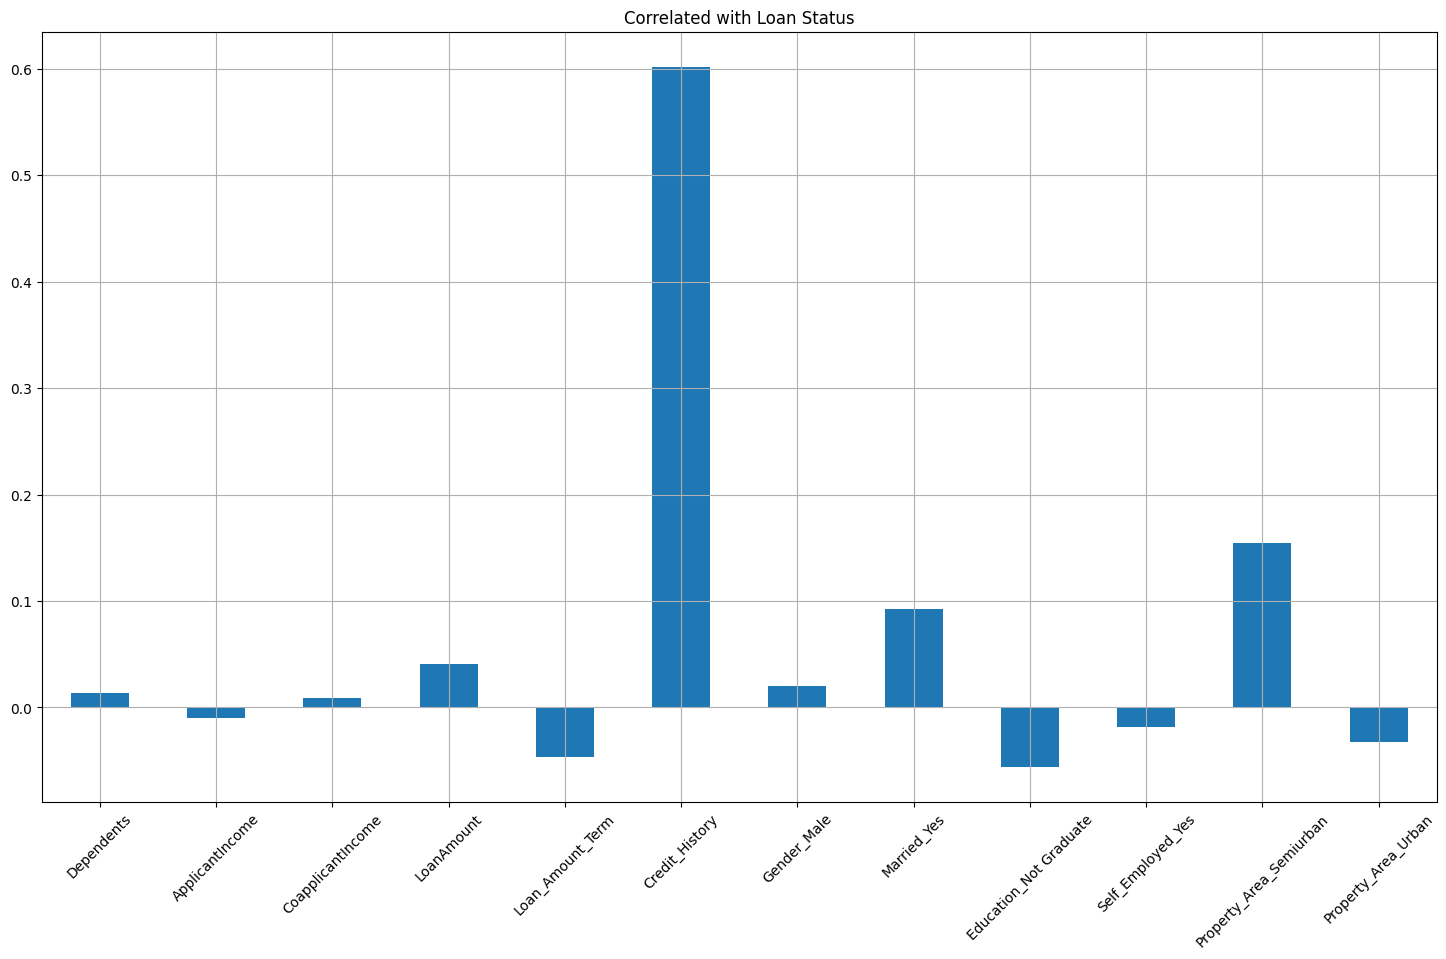

In [ ]:
dataset_2.corrwith(dataset['Loan_Status_Y']).plot.bar(
    figsize=(18,10), title = 'Correlated with Loan Status', rot = 45, grid = True
)

In [ ]:
corr = dataset.corr()
corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Dependents,1.000000,0.143238,-0.067536,0.087036,-0.100041,-0.001221,0.221578,0.390832,0.115834,0.052207,0.003635,0.016968,0.013701
ApplicantIncome,0.143238,1.000000,-0.248693,0.270681,-0.107705,0.004444,0.034817,-0.043796,-0.035147,0.226549,-0.044808,-0.030348,-0.010167
CoapplicantIncome,-0.067536,-0.248693,1.000000,0.114936,0.001893,0.022630,0.108013,0.081431,-0.042834,-0.065167,-0.016298,0.017498,0.009017
LoanAmount,0.087036,0.270681,0.114936,1.000000,0.122913,-0.046473,0.054512,0.142164,-0.011820,0.026137,0.051457,-0.163566,0.041220
Loan_Amount_Term,-0.100041,-0.107705,0.001893,0.122913,1.000000,-0.011864,-0.115235,-0.137144,-0.095375,-0.065269,0.085537,-0.126272,-0.046807
Credit_History,-0.001221,0.004444,0.022630,-0.046473,-0.011864,1.000000,0.032422,0.024432,0.001712,0.026548,0.039088,0.010641,0.601881
Gender_Male,0.221578,0.034817,0.108013,0.054512,-0.115235,0.032422,1.000000,0.358371,0.113260,-0.004182,-0.126072,0.068479,0.020302
Married_Yes,0.390832,-0.043796,0.081431,0.142164,-0.137144,0.024432,0.358371,1.000000,0.040532,0.001022,-0.001814,0.029571,0.092473
Education_Not Graduate,0.115834,-0.035147,-0.042834,-0.011820,-0.095375,0.001712,0.113260,0.040532,1.000000,0.031469,-0.015511,-0.063597,-0.055586
Self_Employed_Yes,0.052207,0.226549,-0.065167,0.026137,-0.065269,0.026548,-0.004182,0.001022,0.031469,1.000000,0.005816,-0.030418,-0.017947


<Axes: >

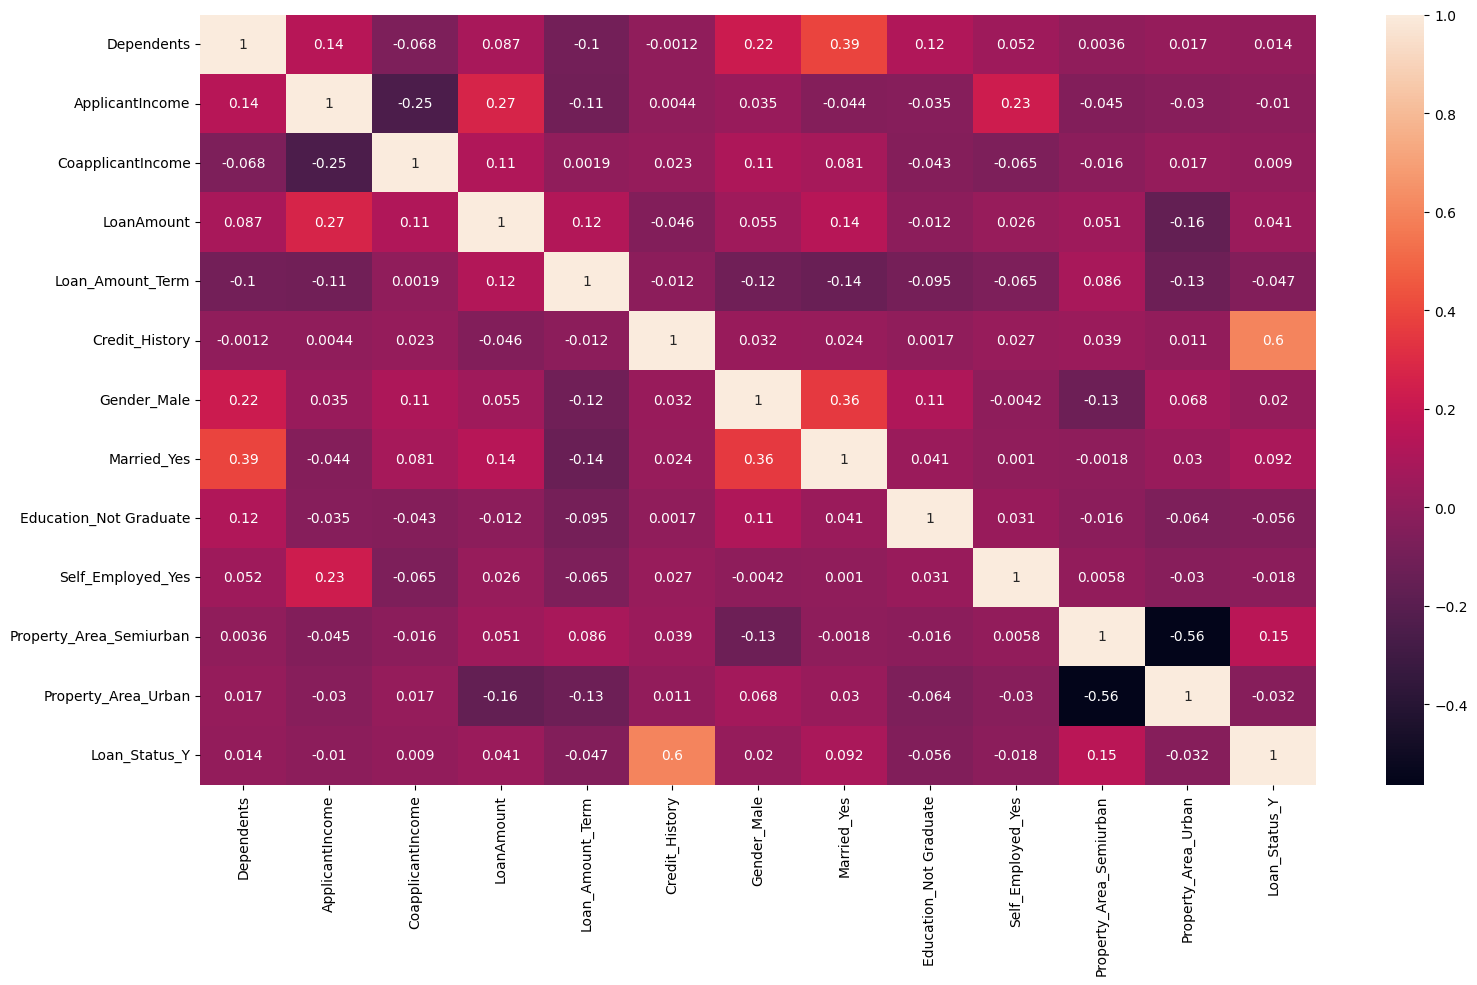

In [ ]:
# Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)

## Split the dataset

In [ ]:
dataset.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
3,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
4,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,1,1


In [ ]:
x = dataset.drop(columns=['Loan_Status_Y'])

In [ ]:
y = dataset['Loan_Status_Y']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(304, 12)

In [ ]:
y_train.shape

(304,)

In [ ]:
x_test.shape

(77, 12)

In [ ]:
y_test.shape

(77,)

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.67683674,  0.42685726, -0.70588229, ..., -0.29934217,
         1.24684476, -0.68973049],
       [-0.67683674, -0.24770167,  0.11354932, ..., -0.29934217,
         1.24684476, -0.68973049],
       [-0.67683674,  1.97467672, -0.70588229, ..., -0.29934217,
        -0.80202447, -0.68973049],
       ...,
       [-0.67683674, -0.67296708,  1.78074858, ..., -0.29934217,
        -0.80202447, -0.68973049],
       [-0.67683674, -0.58571435,  0.45994278, ..., -0.29934217,
        -0.80202447, -0.68973049],
       [-0.67683674, -0.98751684, -0.70588229, ..., -0.29934217,
         1.24684476, -0.68973049]])

In [ ]:
x_test

array([[-6.76836738e-01,  1.64619585e+00, -7.05882295e-01,
         1.14199118e+00,  2.71419398e-01,  4.80679769e-01,
         5.26603194e-01,  8.07572853e-01, -6.07757657e-01,
        -2.99342170e-01, -8.02024465e-01, -6.89730495e-01],
       [ 3.46836736e-01, -1.43624517e+00,  3.36767813e-01,
        -3.24019617e-01,  2.71419398e-01,  4.80679769e-01,
         5.26603194e-01,  8.07572853e-01, -6.07757657e-01,
        -2.99342170e-01, -8.02024465e-01,  1.44984165e+00],
       [ 2.39418369e+00, -4.06809588e-01, -7.05882295e-01,
        -2.19304560e-01,  2.71419398e-01,  4.80679769e-01,
         5.26603194e-01,  8.07572853e-01, -6.07757657e-01,
        -2.99342170e-01, -8.02024465e-01,  1.44984165e+00],
       [ 3.46836736e-01, -1.89450531e+00,  1.04169875e+00,
         1.64650649e-01,  2.71419398e-01,  4.80679769e-01,
         5.26603194e-01,  8.07572853e-01, -6.07757657e-01,
         3.34065862e+00, -8.02024465e-01,  1.44984165e+00],
       [-6.76836738e-01,  1.92228070e-01, -7.0588229

# Model building

##1) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier_rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
results = pd.DataFrame([['Random forest', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall'])

In [ ]:
results

,Model,Accuracy,F1 score,Precision,Recall
0,Random forest,0.805195,0.88,0.797101,0.982143


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rf, X= x_train, y=y_train, cv=10 )

print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 84.52%
Standard Deviation is 4.45%


##2) SVM

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state=42)
classifier_svc.fit(x_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred = classifier_svc.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([['SVM', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall'])
results = results.append(model_results, ignore_index=True)

<ipython-input-367-201e45b0e563>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


In [ ]:
results

,Model,Accuracy,F1 score,Precision,Recall
0,Random forest,0.805195,0.880000,0.797101,0.982143
1,SVM,0.818182,0.888889,0.800000,1.000000


In [ ]:
accuracies = cross_val_score(estimator = classifier_svc, X= x_train, y=y_train, cv=10 )

print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 85.52%
Standard Deviation is 3.06%


## 3) Decision Tree

In [ ]:
#XGBooster and then stack with SVM

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_tr = DecisionTreeClassifier(random_state=42)
classifier_tr.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = classifier_tr.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([['Tree', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall'])
results = results.append(model_results, ignore_index=True)

<ipython-input-374-97b1d28cbb5c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


In [ ]:
results

,Model,Accuracy,F1 score,Precision,Recall
0,Random forest,0.805195,0.880000,0.797101,0.982143
1,SVM,0.818182,0.888889,0.800000,1.000000
2,Tree,0.766234,0.850000,0.796875,0.910714


## 4) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=42)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = classifier_lr.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([['Logistic', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall'])
results = results.append(model_results, ignore_index=True)
results

<ipython-input-379-bad15479e2fa>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


,Model,Accuracy,F1 score,Precision,Recall
0,Random forest,0.805195,0.880000,0.797101,0.982143
1,SVM,0.818182,0.888889,0.800000,1.000000
2,Tree,0.766234,0.850000,0.796875,0.910714
3,Logistic,0.818182,0.888889,0.800000,1.000000


## 5) GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_gbm = GradientBoostingClassifier(random_state=42)
classifier_gbm.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = classifier_lr.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([['gbm', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall'])
results = results.append(model_results, ignore_index=True)
results

<ipython-input-383-479fa922cc93>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


,Model,Accuracy,F1 score,Precision,Recall
0,Random forest,0.805195,0.880000,0.797101,0.982143
1,SVM,0.818182,0.888889,0.800000,1.000000
2,Tree,0.766234,0.850000,0.796875,0.910714
3,Logistic,0.818182,0.888889,0.800000,1.000000
4,gbm,0.818182,0.888889,0.800000,1.000000


## 6) Stacking Ensemble method

In [ ]:
from sklearn.ensemble import StackingClassifier

classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(x_train, y_train)

classifier_svc = SVC(random_state=42)
classifier_svc.fit(x_train, y_train)

classifier_tr = DecisionTreeClassifier(random_state=42)
classifier_tr.fit(x_train, y_train)

classifier_gbm = GradientBoostingClassifier(random_state=42)
classifier_gbm.fit(x_train, y_train)


estimator_list = [
    ('classifier_rf',classifier_rf),
    ('classifier_svc',classifier_svc),
    ('classifier_tr',classifier_tr),
    ('classifier_gbm',classifier_gbm)
    ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator= LogisticRegression()
)

# Train stacked model
stack_model.fit(x_train, y_train)

StackingClassifier(estimators=[('classifier_rf',
                                RandomForestClassifier(random_state=42)),
                               ('classifier_svc', SVC(random_state=42)),
                               ('classifier_tr',
                                DecisionTreeClassifier(random_state=42)),
                               ('classifier_gbm',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred = stack_model.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
model1_results = pd.DataFrame([['Stacked', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall'])
results = results.append(model1_results, ignore_index=True)

<ipython-input-387-13b10d06efd5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model1_results, ignore_index=True)


In [ ]:
results

,Model,Accuracy,F1 score,Precision,Recall
0,Random forest,0.805195,0.880000,0.797101,0.982143
1,SVM,0.818182,0.888889,0.800000,1.000000
2,Tree,0.766234,0.850000,0.796875,0.910714
3,Logistic,0.818182,0.888889,0.800000,1.000000
4,gbm,0.818182,0.888889,0.800000,1.000000
5,Stacked,0.805195,0.880000,0.797101,0.982143


# Finalise the Model (SVM)

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state=42)
classifier_svc.fit(x_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred = classifier_svc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.8181818181818182

# Parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

parameters = {'C': reciprocal(0.001, 1000),
    'gamma': expon(scale=1.0),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
              }

In [ ]:
random_search = RandomizedSearchCV(estimator = classifier_svc, param_distributions=parameters,
                                   n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)


In [ ]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ae9bf565900>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ae9c018d450>,
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [ ]:
random_search.best_estimator_

SVC(C=427.87435167598187, gamma=0.0007790692366582295, kernel='sigmoid',
    random_state=42)

In [ ]:
random_search.best_params_

{'C': 427.87435167598187, 'gamma': 0.0007790692366582295, 'kernel': 'sigmoid'}

In [ ]:
random_search.best_score_

0.8519672131147541